# Load

In [1]:
from palmerpenguins import load_penguins

penguins = load_penguins()

# EDA

In [2]:
import pandas as pd

penguins.head()
penguins["sex_01"] = penguins.sex.replace({"male": 1, "female":0})
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_01
count,342.000000,342.000000,342.000000,342.000000,344.000000,333.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070,0.504505
std,5.459584,1.974793,14.061714,801.954536,0.818356,0.500732
min,32.100000,13.100000,172.000000,2700.000000,2007.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000,1.000000


# Plot

/Users/danielchen/.pyenv/versions/ds/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


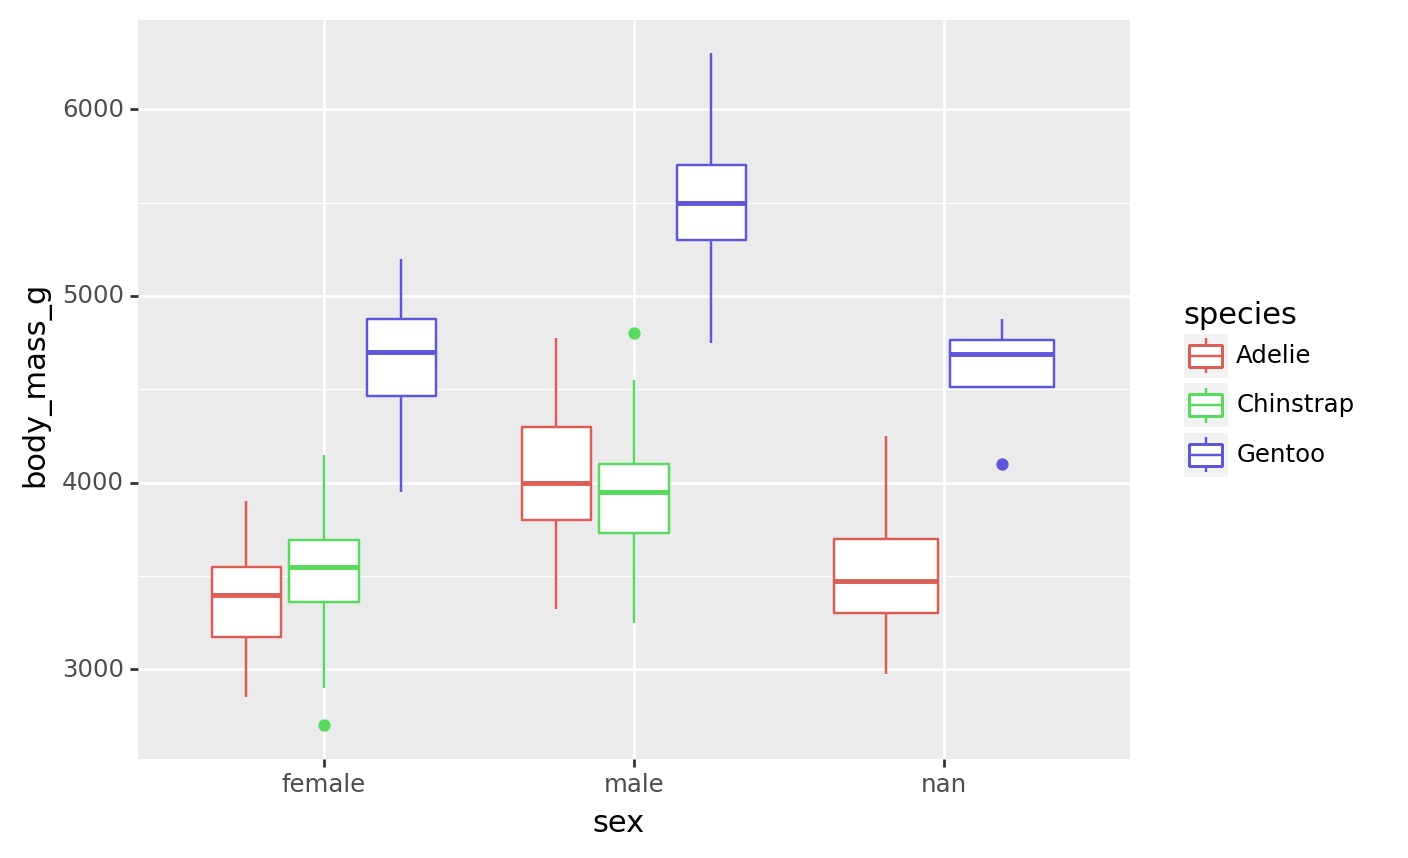

<ggplot: (381199153)>

In [3]:
from plotnine import ggplot, aes, geom_boxplot

g = (
    ggplot(data=penguins, mapping=aes(x="sex", y="body_mass_g", color="species"))
    + geom_boxplot()
)
g

# Model

In [4]:
import statsmodels.formula.api as smf

pen_no_na = penguins.dropna()
log_reg = smf.logit("sex_01 ~ body_mass_g", data=pen_no_na).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.595563
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 sex_01   No. Observations:                  333
Model:                          Logit   Df Residuals:                      331
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                  0.1407
Time:                        00:09:21   Log-Likelihood:                -198.32
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 7.627e-16
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.1625      0.724     -7.127      0.000      -6.582      -3.743
body_mass_g     0.0012      0.000      7.177      0.000       0.001       0.002
===============================================================================
"""